In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from matplotlib.backends.backend_pdf import PdfPages
#ML_Visuals = PdfPages('ML_Bank_Attr_Visualisation.pdf')

# Load csv as pandas frame and drop useless columns

file = r'RIA_ML_Data_Set.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data) 
df.head()

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,CustomerId,CreditRating,Customer Address,Industry,CustomerSegment,Turnover,Established Date,DistanceToResidence,Tenure,NumOfProducts,...,No Of Transactions,% difference in balance amount for 6 Months,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit
0,C055,A,Cust_Addr_55,Manufaturing,Small_customer,231150900,1999-03-01,High Proximity,2010-01-27,56,...,11,-0.180000,18,11,4,11,3,1,22,Yes
1,C021,C,Cust_Addr_21,NBFI,Large_customer,200100000,2000-03-17,Low Proximity,2018-01-03,98,...,4,-0.599900,9,10,11,9,10,8,44,Yes
2,C015,A,Cust_Addr_15,NBFI,Large_customer,8000700000,1996-11-12,High Proximity,2014-03-26,560,...,5,-0.016851,7,8,9,7,8,6,11,No
3,C062,C,Cust_Addr_62,Services,Small_customer,526750000,2000-07-26,Low Proximity,2019-06-23,65,...,32,-0.586900,13,14,3,14,2,0,85,Yes
4,C029,B,Cust_Addr_29,Services,Mid_customer,551000080,1999-09-01,Medium Proximity,2012-02-17,94,...,32,-0.413100,9,10,11,9,10,8,43,Yes


In [2]:
print('Shape' , df.shape)
print('Data Types')
print(df.dtypes)

Shape (81, 27)
Data Types
CustomerId                                                      object
CreditRating                                                    object
Customer Address                                                object
Industry                                                        object
CustomerSegment                                                 object
Turnover                                                         int64
Established Date                                        datetime64[ns]
DistanceToResidence                                             object
Tenure                                                  datetime64[ns]
NumOfProducts                                                    int64
Liquidity                                                        int64
Payments                                                         int64
Lending_Loan                                                     int64
Trade                                              

In [3]:
df.describe()

,Turnover,NumOfProducts,Liquidity,Payments,Lending_Loan,Trade,Insurance,Aggregate Balance,No Of Transactions,% difference in balance amount for 6 Months,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains
count,8.100000e+01,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2.552804e+09,233.444444,273.037037,23252.864198,1.802770e+06,2.635803e+06,1.509367e+06,3.175926e+06,47.518519,-0.143315,7.395062,7.012346,5.975309,7.333333,6.197531,5.530864,27.864198
std,3.818556e+09,184.289378,308.773641,23644.072687,1.934873e+06,1.961039e+06,1.203077e+06,2.552007e+06,57.565422,0.241403,4.926152,4.854106,4.183226,3.987480,3.960492,3.943623,22.003269
min,1.157500e+07,13.000000,2.000000,1120.000000,3.203000e+05,3.939690e+05,1.352995e+05,5.909535e+05,4.000000,-0.612900,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,1.000000
25%,1.352500e+08,68.000000,38.000000,6009.000000,7.006000e+05,1.046607e+06,7.404595e+05,1.291500e+06,6.000000,-0.379800,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,11.000000
50%,7.000950e+08,179.000000,86.000000,11009.000000,9.012000e+05,2.738000e+06,1.247590e+06,1.846107e+06,31.000000,-0.038833,8.000000,8.000000,4.000000,8.000000,5.000000,7.000000,21.000000
75%,1.002040e+09,399.000000,666.000000,36000.000000,2.302000e+06,4.393600e+06,1.533198e+06,4.739660e+06,77.000000,0.063800,10.000000,11.000000,10.000000,10.000000,9.000000,9.000000,44.000000
max,1.200000e+10,608.000000,800.000000,97017.000000,9.402600e+06,7.864198e+06,4.431198e+06,1.020719e+07,308.000000,0.109800,23.000000,20.000000,14.000000,17.000000,13.000000,11.000000,88.000000


In [4]:
from datetime import datetime
from dateutil import relativedelta
from datetime import date

today = date.today()

def calculate_age(dtob):
    today=date.today()
    delta= relativedelta.relativedelta(today,dtob)
    return (round((delta.years+(delta.months/12)), 2))

In [5]:
establish_age=df['Established Date'].dt.date
Age = [0] * len(establish_age)
for  i in range(0,len(establish_age)):
    Age[i]=calculate_age(establish_age[i])
df['Age']= Age
df=df.drop(['Established Date'], axis = 1)

In [6]:
Tenure=df['Tenure'].dt.date
Tenure_ = [0] * len(Tenure)
for  i in range(0,len(Tenure)):
    Tenure_[i]=calculate_age(Tenure[i])
df['Tenure_']=Tenure_
df=df.drop(['Tenure'], axis = 1)

In [7]:
print('Data Types Object -Unique')
print(df['CreditRating'].unique())
print(df['Industry'].unique())
print(df['CustomerSegment'].unique())
print(df['HasCrCard'].unique())
print(df['DistanceToResidence'].unique())
print(df['Exit'].unique())

Data Types Object -Unique
['A' 'C' 'B']
['Manufaturing' 'NBFI' 'Services']
['Small_customer' 'Large_customer' 'Mid_customer']
['Yes' 'No']
['High Proximity' 'Low Proximity' 'Medium Proximity']
['Yes' 'No']


In [8]:
# converts categorical features to integers

def label_encoder(data_: df, columns_name_: list):
    le = LabelEncoder()
    for i in columns_name_:
        le.fit(data_[i])
        data_[i] = le.transform(data_[i])
    return data_

In [9]:
df.head(10)

,CustomerId,CreditRating,Customer Address,Industry,CustomerSegment,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,...,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit,Age,Tenure_
0,C055,A,Cust_Addr_55,Manufaturing,Small_customer,231150900,High Proximity,56,636,36009,...,18,11,4,11,3,1,22,Yes,21.58,10.67
1,C021,C,Cust_Addr_21,NBFI,Large_customer,200100000,Low Proximity,98,766,10003,...,9,10,11,9,10,8,44,Yes,20.58,2.75
2,C015,A,Cust_Addr_15,NBFI,Large_customer,8000700000,High Proximity,560,112,6017,...,7,8,9,7,8,6,11,No,23.92,6.50
3,C062,C,Cust_Addr_62,Services,Small_customer,526750000,Low Proximity,65,20,3209,...,13,14,3,14,2,0,85,Yes,20.17,1.25
4,C029,B,Cust_Addr_29,Services,Mid_customer,551000080,Medium Proximity,94,699,23020,...,9,10,11,9,10,8,43,Yes,21.08,8.67
5,C081,B,Cust_Addr_81,NBFI,Small_customer,55000033,Low Proximity,608,38,4012,...,1,2,3,1,2,0,3,No,23.08,8.50
6,C066,C,Cust_Addr_66,NBFI,Small_customer,317750000,Low Proximity,13,738,10026,...,23,18,3,10,2,0,44,Yes,24.00,0.50
7,C050,B,Cust_Addr_50,Services,Mid_customer,728100180,Low Proximity,21,88,8523,...,12,13,14,12,13,11,59,Yes,23.92,2.67
8,C009,B,Cust_Addr_9,NBFI,Large_customer,7000400000,Low Proximity,422,15,4000,...,4,7,1,2,12,10,11,No,25.25,4.25
9,C051,C,Cust_Addr_51,NBFI,Mid_customer,400195500,Low Proximity,58,63,6023,...,8,9,10,8,9,7,38,Yes,23.83,6.58


In [10]:

df = label_encoder(df, ['CreditRating'])
df = label_encoder(df, ['DistanceToResidence'])
df = label_encoder(df, ['HasCrCard'])
df = label_encoder(df, ['Exit'])


In [11]:
df.head(10)

,CustomerId,CreditRating,Customer Address,Industry,CustomerSegment,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,...,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit,Age,Tenure_
0,C055,0,Cust_Addr_55,Manufaturing,Small_customer,231150900,0,56,636,36009,...,18,11,4,11,3,1,22,1,21.58,10.67
1,C021,2,Cust_Addr_21,NBFI,Large_customer,200100000,1,98,766,10003,...,9,10,11,9,10,8,44,1,20.58,2.75
2,C015,0,Cust_Addr_15,NBFI,Large_customer,8000700000,0,560,112,6017,...,7,8,9,7,8,6,11,0,23.92,6.50
3,C062,2,Cust_Addr_62,Services,Small_customer,526750000,1,65,20,3209,...,13,14,3,14,2,0,85,1,20.17,1.25
4,C029,1,Cust_Addr_29,Services,Mid_customer,551000080,2,94,699,23020,...,9,10,11,9,10,8,43,1,21.08,8.67
5,C081,1,Cust_Addr_81,NBFI,Small_customer,55000033,1,608,38,4012,...,1,2,3,1,2,0,3,0,23.08,8.50
6,C066,2,Cust_Addr_66,NBFI,Small_customer,317750000,1,13,738,10026,...,23,18,3,10,2,0,44,1,24.00,0.50
7,C050,1,Cust_Addr_50,Services,Mid_customer,728100180,1,21,88,8523,...,12,13,14,12,13,11,59,1,23.92,2.67
8,C009,1,Cust_Addr_9,NBFI,Large_customer,7000400000,1,422,15,4000,...,4,7,1,2,12,10,11,0,25.25,4.25
9,C051,2,Cust_Addr_51,NBFI,Mid_customer,400195500,1,58,63,6023,...,8,9,10,8,9,7,38,1,23.83,6.58


In [12]:
'''
Industry = pd.get_dummies(df.Industry)
df = pd.concat([df, Industry], axis=1)

Cust_Seg = pd.get_dummies(df.CustomerSegment)
df = pd.concat([df, Cust_Seg], axis=1)
'''

'\nIndustry = pd.get_dummies(df.Industry)\ndf = pd.concat([df, Industry], axis=1)\n\nCust_Seg = pd.get_dummies(df.CustomerSegment)\ndf = pd.concat([df, Cust_Seg], axis=1)\n'

In [13]:
df=pd.get_dummies(df,columns=['Industry','CustomerSegment'],drop_first=True)

<AxesSubplot:>

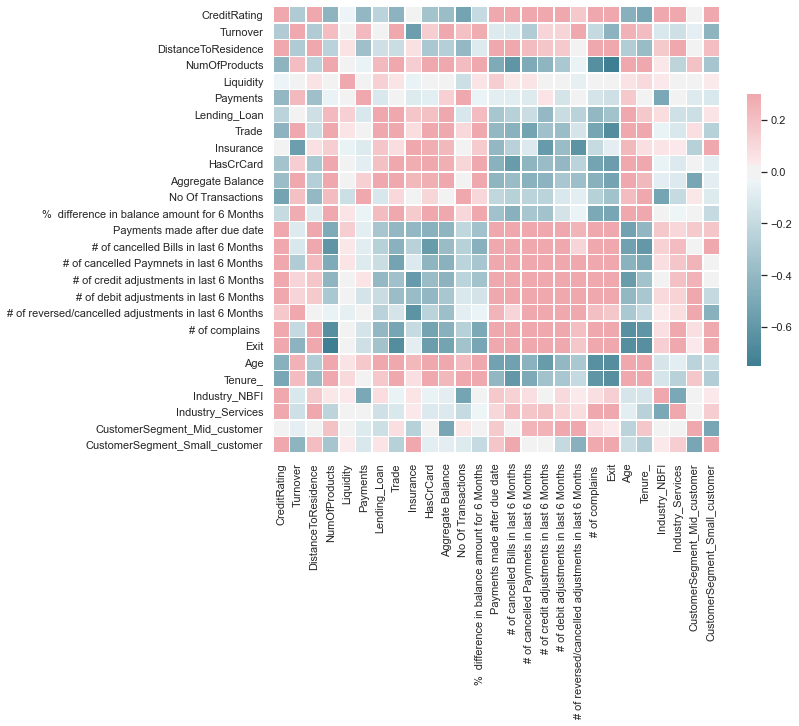

In [14]:
# correlation table

corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=None, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
df.head(1)

,CustomerId,CreditRating,Customer Address,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,Lending_Loan,Trade,...,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit,Age,Tenure_,Industry_NBFI,Industry_Services,CustomerSegment_Mid_customer,CustomerSegment_Small_customer
0,C055,0,Cust_Addr_55,231150900,0,56,636,36009,3600900,1230000,...,3,1,22,1,21.58,10.67,0,0,0,1


In [16]:
df.iloc[:, 16:20]

,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months
0,11,4,11,3
1,10,11,9,10
2,8,9,7,8
3,14,3,14,2
4,10,11,9,10
...,...,...,...,...
76,13,14,12,13
77,9,10,8,9
78,3,4,2,3
79,12,13,11,12


In [17]:
# As all the cancllaions are highly corellated we decide to merge them into a column called cancellation
df.loc[:,'Cancellations'] = df.iloc[:,16:22].sum(axis=1)



In [18]:

df=df.drop(['# of cancelled Bills in last 6 Months','# of cancelled Paymnets in last 6 Months','# of credit adjustments in last 6 Months','# of debit adjustments in last 6 Months','# of reversed/cancelled adjustments in last 6 Months'], axis = 1)


In [19]:
df['Exited']=df['Exit']

In [20]:
#We removed Customer ID ,Customer Address
df=df.drop(['Customer Address','CustomerId','Exit'], axis = 1)


In [21]:
df= df.rename(columns={'Exited': 'Exit'})

In [22]:
df.head()

,CreditRating,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,Lending_Loan,Trade,Insurance,HasCrCard,...,Payments made after due date,# of complains,Age,Tenure_,Industry_NBFI,Industry_Services,CustomerSegment_Mid_customer,CustomerSegment_Small_customer,Cancellations,Exit
0,0,231150900,0,56,636,36009,3600900,1230000,1329999.5,1,...,18,22,21.58,10.67,0,0,0,1,52,1
1,2,200100000,1,98,766,10003,1000300,492738,1492737.5,1,...,9,44,20.58,2.75,1,0,0,0,92,1
2,0,8000700000,0,560,112,6017,4601700,1395691,395690.5,1,...,7,11,23.92,6.50,1,0,0,0,49,0
3,2,526750000,1,65,20,3209,320900,1232829,1232828.5,0,...,13,85,20.17,1.25,0,1,0,1,118,1
4,1,551000080,2,94,699,23020,2302000,738369,738368.5,0,...,9,43,21.08,8.67,0,1,1,0,91,1


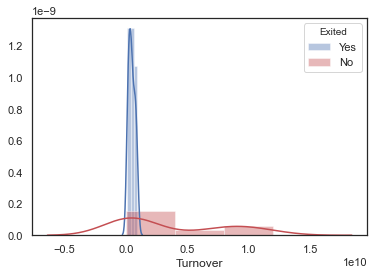

In [23]:
# Attributes distribution with respect to Prediction factor

ax=plt.figure()
ax=sns.distplot(data[df['Exit'] == 1]['Turnover'], color = 'b',label='Yes')
ax=sns.distplot(data[df['Exit'] == 0]['Turnover'], color = 'r',label='No')

ax.legend(title='Exited')
#ML_Visuals.savefig()


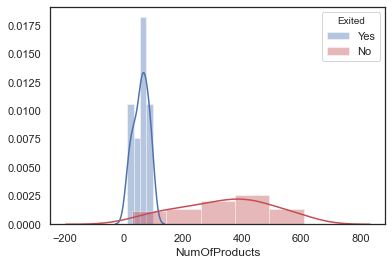

In [24]:

ax=sns.distplot(data[df['Exit'] == 1]['NumOfProducts'], color = 'b',label='Yes')
ax=sns.distplot(data[df['Exit'] == 0]['NumOfProducts'], color = 'r',label='No')
ax.legend(title='Exited')
#ML_Visuals.savefig()


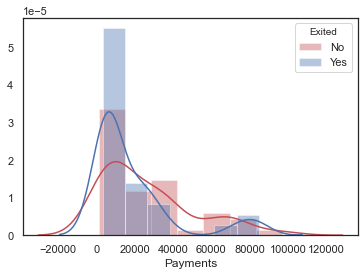

In [25]:
ax=sns.distplot(data[df['Exit'] == 0]['Payments'], color='r',label="No")
ax=sns.distplot(data[df['Exit'] == 1]['Payments'], color = 'b',label="Yes")
ax.legend(title='Exited')
#ML_Visuals.savefig()



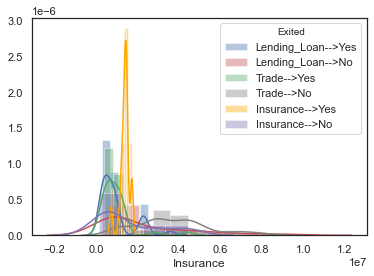

In [26]:
ax=sns.distplot(data[df['Exit'] == 1]['Lending_Loan'], color = 'b',label="Lending_Loan-->Yes")
ax=sns.distplot(data[df['Exit'] == 0]['Lending_Loan'], color = 'r',label="Lending_Loan-->No")
ax=sns.distplot(data[df['Exit'] == 1]['Trade'], color = 'g',label="Trade-->Yes")
ax=sns.distplot(data[df['Exit'] == 0]['Trade'], color = 'grey',label="Trade-->No")
ax=sns.distplot(data[df['Exit'] == 1]['Insurance'], color = 'orange',label="Insurance-->Yes")
ax=sns.distplot(data[df['Exit'] == 0]['Insurance'], color = 'm',label="Insurance-->No")
ax.legend(title='Exited')
#ML_Visuals.savefig()


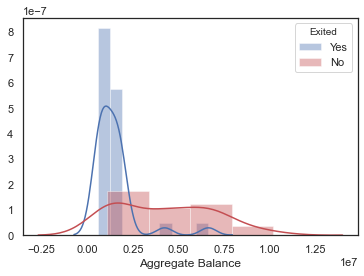

In [27]:

ax=sns.distplot(data[df['Exit'] == 1]['Aggregate Balance'], color = 'b',label='Yes')
ax=sns.distplot(data[df['Exit'] == 0]['Aggregate Balance'], color = 'r',label='No')
ax.legend(title='Exited')
#ML_Visuals.savefig()


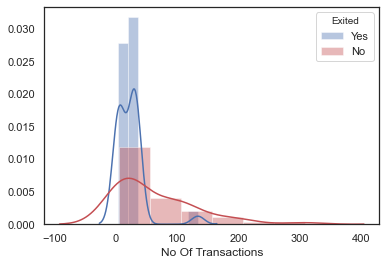

In [28]:

ax=sns.distplot(data[df['Exit'] == 1]['No Of Transactions'], color = 'b',label='Yes' )
ax=sns.distplot(data[df['Exit'] == 0]['No Of Transactions'], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()


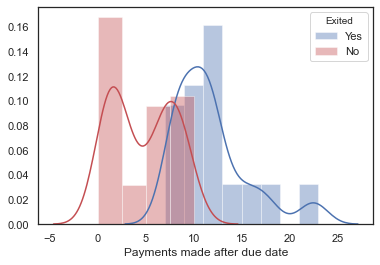

In [29]:


ax=sns.distplot(data[df['Exit'] == 1]['Payments made after due date'], color = 'b',label='Yes' )
ax=sns.distplot(data[df['Exit'] == 0]['Payments made after due date'], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()


[Text(0.5, 1.0, 'Years In Bank ')]

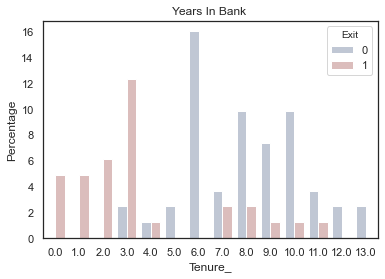

In [30]:

ax=sns.barplot(x=round(df.Tenure_),y=round(df.Tenure_),data=df,hue="Exit", palette="vlag",estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Years In Bank")
ax.set(ylabel="Percentage")
ax.set(title="Years In Bank ")
#ML_Visuals.savefig()

[Text(0, 0.5, 'Percentage')]

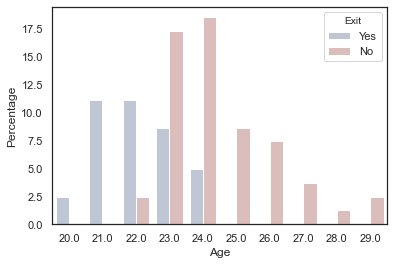

In [31]:


#ax=plt.figure(figsize=(10,5))
ax=sns.barplot(x=round(df.Age),y=round(df.Age),data=data,hue="Exit", palette="vlag" ,estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Age")
ax.set(ylabel="Percentage")
#ax.set(title="Age ")
#ML_Visuals.savefig()


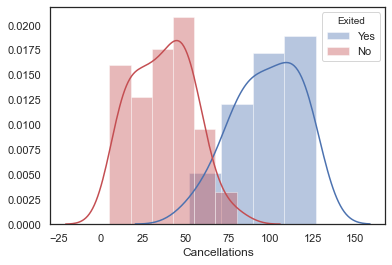

In [32]:
ax=sns.distplot(df[df['Exit'] == 1]['Cancellations'], color = 'b',label='Yes' )
ax=sns.distplot(df[df['Exit'] == 0]['Cancellations'], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()

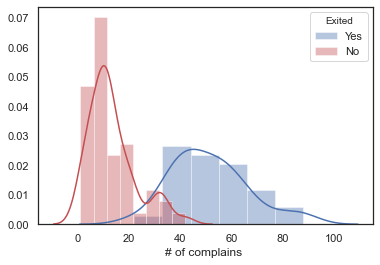

In [33]:
ax=sns.distplot(df[df['Exit'] == 1]['# of complains '], color = 'b',label='Yes' )
ax=sns.distplot(df[df['Exit'] == 0]['# of complains '], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()

Text(0, 0.5, 'Count')

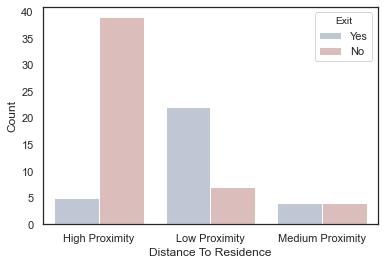

In [34]:

#ax=plt.figure(figsize=(10,8))
ax=sns.countplot(x="DistanceToResidence",hue="Exit" ,palette="vlag",data=data)
ax.set_xlabel("Distance To Residence"),
ax.set_ylabel("Count")
#ax.set_title("Distance To Residence Count")
#ML_Visuals.savefig()

Text(0, 0.5, 'Count')

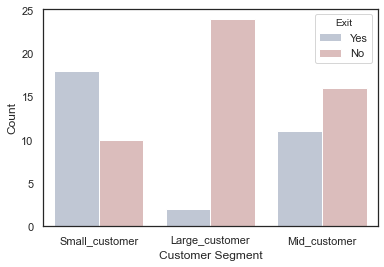

In [35]:


#ax=plt.figure(figsize=(8,7))
ax=sns.countplot(x="CustomerSegment",hue="Exit",palette="vlag" ,data=data)
ax.set_xlabel("Customer Segment")
ax.set_ylabel("Count")
#ax.set_title("Customer Segment Count")  
#ML_Visuals.savefig()


Text(0, 0.5, 'Count')

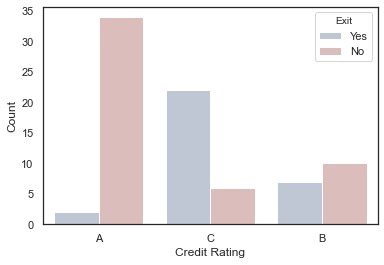

In [36]:


ax=sns.countplot(x="CreditRating",hue="Exit",palette="vlag",data=data)
ax.set_xlabel("Credit Rating")
ax.set_ylabel("Count")
#ML_Visuals.savefig()

In [37]:
from sklearn.model_selection import train_test_split
x=df.iloc[:, :-1]
y=df['Exit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.10, random_state = 42)

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train,y_train)

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [39]:
print(model.feature_importances_)

[0.06001462 0.01790341 0.01643092 0.15776488 0.         0.
 0.         0.05754836 0.0556808  0.         0.         0.
 0.         0.01760277 0.3588379  0.07552094 0.0208072  0.
 0.         0.         0.01387747 0.14801073]


<function matplotlib.pyplot.show(close=None, block=None)>

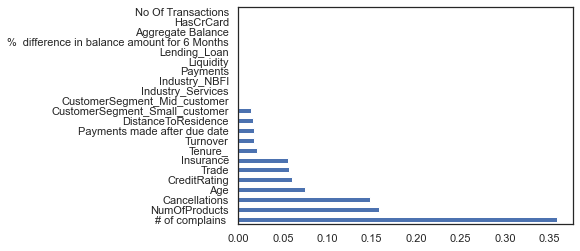

In [40]:
fet_imp=pd.Series(model.feature_importances_,index=x_test.columns)
fet_imp.nlargest(23).plot(kind='barh')
plt.show

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train,y_train)

print("Accuracy of Random Forest Algo: ", rf.score(x_test,y_test))

Accuracy of Random Forest Algo:  0.8888888888888888


In [42]:
final_score={}
final_score['Random Forest'] = rf.score(x_test,y_test)
final_score

{'Random Forest': 0.8888888888888888}

In [43]:
predictions=rf.predict(x_test)

<AxesSubplot:xlabel='Exit'>

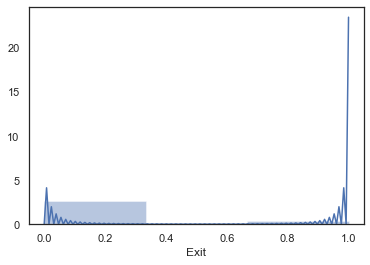

In [44]:
sns.distplot(y_test-predictions)

In [45]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')


# dump information to that file
pickle.dump(rf, file)

In [46]:
model = open('random_forest_regression_model.pkl','rb')
forest = pickle.load(model)

In [47]:
y_prediction = forest.predict(x_test)

In [48]:
x=[[0, 2.0, 0, 2, 2.0, 2.0, 2.0, 2.0, 2.0, 0, 2.0, 2, 2.0, 2, 2, 28.75, 19.75, 0, 0, 0, 0, 10]]

In [49]:
y=forest.predict(x)

In [50]:
y_prediction

array([1, 0, 0, 1, 0, 1, 1, 1, 1])

In [51]:
y

array([0])

In [52]:
list(x_test.columns.values.tolist()) 

['CreditRating',
 'Turnover',
 'DistanceToResidence',
 'NumOfProducts',
 'Liquidity',
 'Payments',
 'Lending_Loan',
 'Trade',
 'Insurance',
 'HasCrCard',
 'Aggregate Balance',
 'No Of Transactions',
 '%  difference in balance amount for 6 Months',
 'Payments made after due date',
 '# of complains ',
 'Age',
 'Tenure_',
 'Industry_NBFI',
 'Industry_Services',
 'CustomerSegment_Mid_customer',
 'CustomerSegment_Small_customer',
 'Cancellations']